<a href="https://colab.research.google.com/github/ZakiLazuardi987/PCVK_Ganjil_2024/blob/main/Week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


 Mengubah tingkat kecerahan citra 
----------------------------------
Masukkan nilai kecerahan: 50


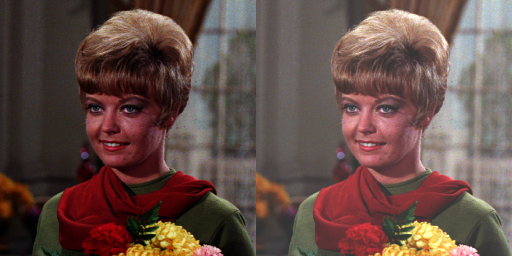

In [3]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow

print(' Mengubah tingkat kecerahan citra ')
print('----------------------------------')
try:
  brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/Tugas PCVK/Images/female.tiff')
brightness_image = np.zeros(original.shape, original.dtype)

# Akses per pixel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip(original[y,x,c] + brightness, 0, 255)

# Cara simple tanpa for loop
# brightness_image = cv.convertScaleAbs(original, beta = brightness)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)

**TUGAS PRAKTIKUM**

Citra Asli dan Citra Negatif (Inverse Citra):


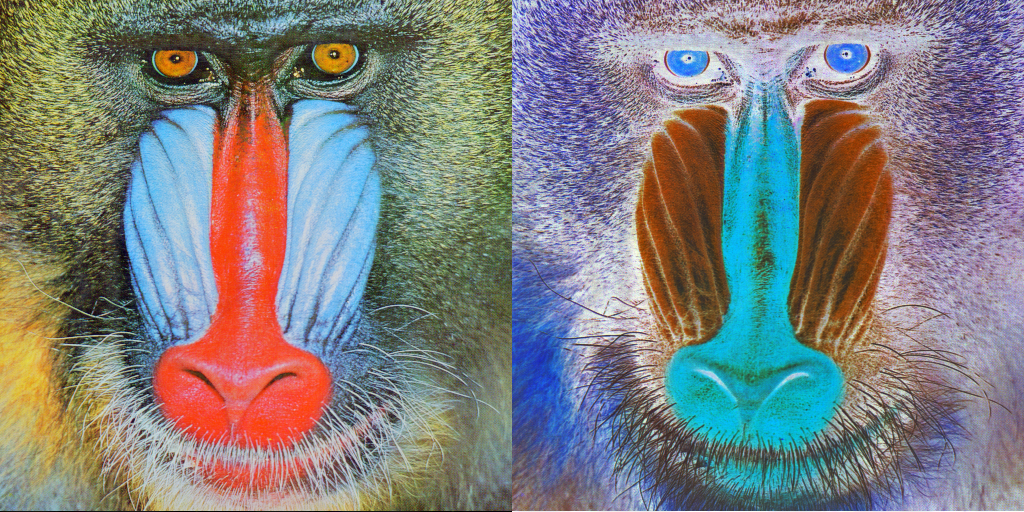

In [4]:
# 1.	Implementasikan inverse citra pada Google Colaboratory menggunakan formula yang terdapat pada bagian Ulasan Teori, sehingga menghasilkan keluaran seperti berikut:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow

# Memuat citra asli
image_path = '/content/drive/MyDrive/Tugas PCVK/Images/mandrill.tiff'
image = cv.imread(image_path)

# Menghitung citra negatif menggunakan formula g(x,y) = 255 - f(x,y)
inverse_image = 255 - image

# Menggabungkan citra asli dan citra negatif secara horizontal
concatenated_image = cv.hconcat([image, inverse_image])

# Menampilkan citra asli dan citra negatif secara berdampingan
print("Citra Asli dan Citra Negatif (Inverse Citra):")
cv2_imshow(concatenated_image)  # Menampilkan hasil concat


 Mengubah kontras dan tingkat kecerahan citra 
----------------------------------------------
Masukkan tingkat kecerahan [-255 hingga 255]: 50
Masukkan kontras [1.0 hingga 3.0]: 2


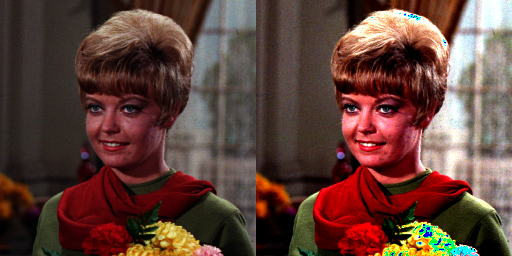

In [9]:
print(' Mengubah kontras dan tingkat kecerahan citra ')
print('----------------------------------------------')

# Fungsi untuk melakukan operasi truncate agar nilai tetap dalam range [0, 255]
def truncate(value):
    return max(0, min(255, value))

# Fungsi untuk menerapkan perubahan brightness dan contrast
def apply_brightness_contrast(image, brightness=0, contrast=1.0):
    # Menerapkan brightness: setiap pixel ditambah dengan nilai brightness
    new_image = image + brightness
    new_image = np.clip(new_image, 0, 255)  # Pastikan nilai pixel tetap antara [0, 255]

    # Menghitung Contrast Correction Factor
    factor = contrast
    contrasted_image = np.zeros(image.shape, dtype=np.uint8)

    # Transformasi kontras
    for y in range(image.shape[0]):
        for x in range(image.shape[1]):
            for c in range(3):  # 0=Red, 1=Green, 2=Blue
                pixel_value = new_image[y, x, c]
                new_value = truncate(factor * (pixel_value - 128) + 128)
                contrasted_image[y, x, c] = new_value

    return contrasted_image

# Memuat citra asli
image_path = '/content/drive/MyDrive/Tugas PCVK/Images/female.tiff'
image = cv.imread(image_path)

# Mendapatkan input nilai kecerahan dan kontras dari pengguna
brightness = int(input("Masukkan tingkat kecerahan [-255 hingga 255]: "))
contrast = float(input("Masukkan kontras [1.0 hingga 3.0]: "))

# Terapkan perubahan brightness dan contrast
modified_image = apply_brightness_contrast(image, brightness=brightness, contrast=contrast)

# Menggabungkan citra asli dan citra yang telah dimodifikasi
concatenated_image = cv.hconcat([image, modified_image])

# Menampilkan citra gabungan (asli dan modifikasi)
cv2_imshow(concatenated_image)

Mengubah tingkat kecerahan citra dengan Transformasi Log
------------------------------------------------------
Masukkan nilai kecerahan: 50


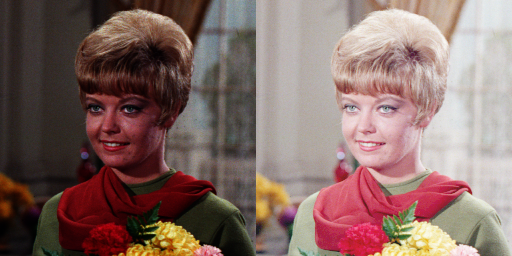

In [11]:
# Fungsi untuk menerapkan transformasi logaritma
def apply_log_transform(image, c=1.0):
    # Konversi citra ke float32 untuk operasi logaritma
    float_image = np.float32(image)

    # Terapkan transformasi logaritma
    log_image = c * np.log(1 + float_image)

    # Normalisasi hasil ke rentang [0, 255]
    log_image = np.uint8(255 * log_image / np.max(log_image))

    return log_image

# Memuat citra asli
image_path = '/content/drive/MyDrive/Tugas PCVK/Images/female.tiff'
image = cv.imread(image_path)

# Mengecek apakah citra berhasil dimuat
if image is None:
    print(f"Error: Citra tidak ditemukan di {image_path}")
else:
    # Menampilkan pesan judul program
    print("Mengubah tingkat kecerahan citra dengan Transformasi Log")
    print("------------------------------------------------------")

    # Mendapatkan input nilai kecerahan dari pengguna
    brightness = int(input("Masukkan nilai kecerahan: "))

    # Terapkan transformasi logaritma dengan konstanta c disesuaikan dengan input brightness
    c = brightness / 100.0  # Nilai konstanta c didasarkan pada input brightness
    log_image = apply_log_transform(image, c=c)

    # Menggabungkan citra asli dan citra yang telah dimodifikasi
    concatenated_image = cv.hconcat([image, log_image])

    # Menampilkan citra gabungan (asli dan modifikasi)
    cv2_imshow(concatenated_image)

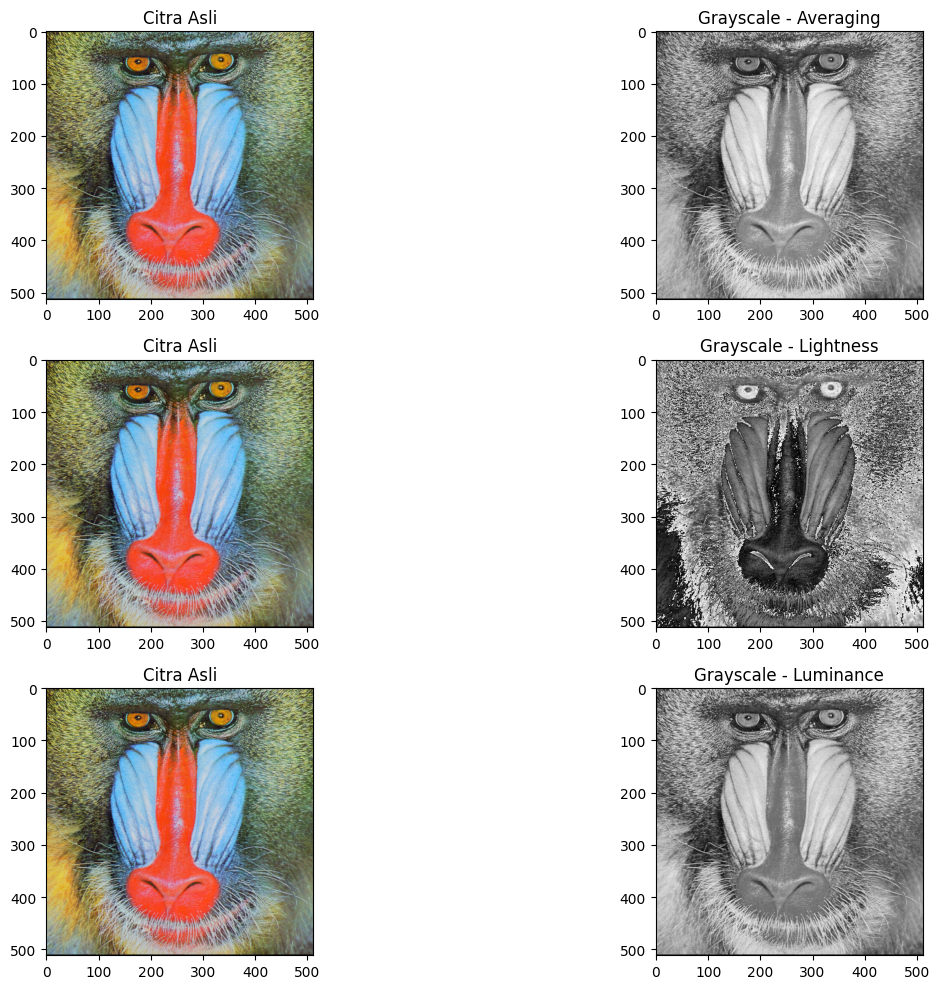

In [17]:
import matplotlib.pyplot as plt

# Fungsi untuk transformasi grayscale menggunakan metode averaging
def grayscale_averaging(image):
    return np.mean(image, axis=2).astype(np.uint8)

# Fungsi untuk transformasi grayscale menggunakan metode lightness
def grayscale_lightness(image):
    max_rgb = np.max(image, axis=2)
    min_rgb = np.min(image, axis=2)
    return ((max_rgb + min_rgb) / 2).astype(np.uint8)

# Fungsi untuk transformasi grayscale menggunakan metode luminance
def grayscale_luminance(image):
    return (0.21 * image[:,:,2] + 0.72 * image[:,:,1] + 0.07 * image[:,:,0]).astype(np.uint8)

# Memuat citra asli
image_path = '/content/drive/MyDrive/Tugas PCVK/Images/mandrill.tiff'
image = cv.imread(image_path)

# Mengecek apakah citra berhasil dimuat
if image is None:
    print(f"Error: Citra tidak ditemukan di {image_path}")
else:
    # Konversi citra ke metode Averaging, Lightness, dan Luminance
    gray_avg = grayscale_averaging(image)
    gray_lightness = grayscale_lightness(image)
    gray_luminance = grayscale_luminance(image)

    # Menampilkan hasil transformasi
    plt.figure(figsize=(15, 10))

    # Gambar Asli
    plt.subplot(3, 2, 1)
    plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
    plt.title('Citra Asli')

    # Grayscale Averaging
    plt.subplot(3, 2, 2)
    plt.imshow(gray_avg, cmap='gray')
    plt.title('Grayscale - Averaging')

    # Grayscale Lightness
    plt.subplot(3, 2, 3)
    plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
    plt.title('Citra Asli')

    plt.subplot(3, 2, 4)
    plt.imshow(gray_lightness, cmap='gray')
    plt.title('Grayscale - Lightness')

    # Grayscale Luminance
    plt.subplot(3, 2, 5)
    plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
    plt.title('Citra Asli')

    plt.subplot(3, 2, 6)
    plt.imshow(gray_luminance, cmap='gray')
    plt.title('Grayscale - Luminance')

    # Tampilkan plot
    plt.tight_layout()
    plt.show()
